In [31]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [321]:
import subprocess

BASE_DIRECTORY = '/Users/emarberg/examples/test/'

def draw_graph(vertices, edges, neato=True):
    def prt(w):
        return ''.join(map(str, w[:-1])) + ':' + str(w[-1])
    s = ['digraph G {']
    s += ['    overlap=false;']
    s += ['    splines=true;']
    s += ['    node [shape=box];']
    for x in vertices:
       s += ['    "%s" [fillcolor=white];' % prt(x)]
    for x, y, label in edges:
        if x in vertices and y in vertices:
            s += ['    "%s" -> "%s" [color="%s"];' % (prt(x), prt(y), 'red' if label else 'black')]
    s += ['}']
    s = '\n'.join(s)
    #
    filename = 'tmp' + str(len(vertices))
    dot_filename = BASE_DIRECTORY + 'dot/' + '%s.dot' % filename
    png_filename = BASE_DIRECTORY + 'png/' + '%s.png' % filename
    with open(dot_filename, 'w') as f:
        f.write(s)
    subprocess.run(["neato" if neato else "dot", "-Tpng", dot_filename, "-o", png_filename])
    subprocess.run(["open", png_filename])

In [322]:
from permutations import Permutation
from tests.test_ogroth import read_cplusplus_ogroth

def read(*mu):
    n = max(mu, default=0) + 2
    ans = read_cplusplus_ogroth(mu)
    bns = {}
    for w, c in ans:
        w = tuple(Permutation(*w).inverse().oneline)
        while len(w) < n:
            w += (len(w) + 1,)
        bns[w] = c
    return bns

In [323]:
def chinese_span(w, n):
    if w[-1] == n + 1:
        for i in range(n // 2, n):
            if max((0,) + w[i:n]) <= n // 2:
                yield (w, w[:i] + (n + 1,) + w[i:-1], 1)
        for i in range(len(w) - 2):
            c, a, b = w[i: i + 3]
            if a < b < c and c != n + 1:
                yield (w, w[:i] + (b, c, a) + w[i + 3:], 0)
                yield (w, w[:i] + (c, b, a) + w[i + 3:], 0)

            #b, c, a = w[i: i + 3]
            #if a < b < c and c != n + 1:
            #    yield (w, w[:i] + (c, b, a) + w[i + 3:], 0)
            

def chinese_class(w):
    ans = set()
    add = {w}
    while add:
        ans |= add
        add = {v for (w, v) in chinese_span(w, -1) if v not in ans}
    return ans


def test_chinese_class(v):
    for w in v:
        for w, x in chinese_span(w):
            assert x in v



In [767]:
def tr(x, a):
    return x + (a[x],) #Permutation(*x).code() + (a[x],)

def appl(t, a):
    x, y, i = t
    return (tr(x, a), tr(y, a), x[i] == len(x) or x[i+1] == len(x))

In [794]:
mu = (5,3,1)
u = read(*mu)
u = {x: u[x] for x in u}

In [795]:
set(u.values())

{1, 2, 3, 4, 6, 8, 9, 10, 12, 18, 20}

In [796]:
e = {
    (x, y, i)
    for x in u for y in u for i in range(len(x) - 1)
    if x < y and x[:i] + (x[i+1],x[i]) + x[i+2:] == y
}

In [800]:
m = (mu[0] + 1) // 2

for x, y, i in e:
    assert m < x[i + 1] <= mu[0] + 1 or x[i] <= m

for x in u:
    for i in range(len(x) - 1):
        if x[i] >= x[i + 1]:
            continue
        y = x[:i] + (x[i + 1],x[i]) + x[i+2:]
        if m < x[i + 1] <= mu[0] + 1 or x[i] <= m:
            assert (x, y, i) in e


In [801]:
draw_graph({tr(x, u) for x in u}, {appl(t, u) for t in e}, neato=False)

In [512]:
{x for x in u if u[x] == 1}

{345612,
 345621,
 354612,
 354621,
 435612,
 435621,
 453612,
 453621,
 534612,
 534621,
 543612,
 543621}

In [513]:
{x for x in u if u[x] == 2}

{342561,
 345162,
 351462,
 352461,
 423561,
 425361,
 435162,
 451362,
 513462,
 514362,
 523461,
 524361}

In [514]:
{x for x in u if u[x] == 3}

{345261,
 354162,
 354261,
 432561,
 452361,
 453162,
 531462,
 532461,
 541362,
 542361}

In [515]:
{x for x in u if u[x] == 4}

{34251,
 34512,
 35142,
 35241,
 42351,
 42513,
 435261,
 45123,
 453261,
 51342,
 51423,
 52341,
 52413,
 534162,
 534261,
 543162,
 543261}

In [516]:
{x for x in u if u[x] == 6}

{34521,
 35412,
 35421,
 42531,
 43251,
 43512,
 45132,
 45213,
 51432,
 52431,
 53142,
 53241,
 54123,
 54213}

In [517]:
{x for x in u if u[x] == 9}

{43521, 45231, 45312, 53412, 53421, 54132, 54231}

In [518]:
{x for x in u if u[x] == 10}

{45321, 54312, 54321}

In [532]:
n=6; 
delta = tuple(range(n - 1, 0, -2))
a = read(*delta)
e = {_ for v in a for _ in chinese_span(v, n)}
assert all(v in a and w in a for v, w, _ in e)
e = {appl(t) for t in e}
draw_graph({tr(x) for x in a if a[x] != max(a.values())}, e, neato=False)

In [266]:
co[n] = set({b: a[b] for b in a if b[-1] == n + 1}.values())

In [253]:
for k in sorted(co):
    print(k, sorted(co[k]))

1 [1]
2 [2]
3 [2, 3]
4 [4, 6]
5 [4, 6, 9, 10]
6 [8, 12, 18, 20]
7 [8, 12, 18, 20, 27, 30, 33, 34, 35]
8 [16, 24, 36, 40, 54, 60, 66, 68, 70]
9 [16, 24, 36, 40, 54, 60, 66, 68, 70, 81, 90, 99, 100, 102, 105, 106, 112, 115, 116, 119, 120, 124, 125, 126]


In [227]:
# from partitions import Partition
# mus = sorted(Partition.subpartitions(delta, strict=True), key=sum)
# for mu in mus:
#    a = read(*mu)
#    print(mu)
#    print(a)
#    print()
#    test_chinese_class(a, n)

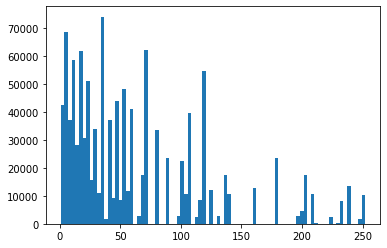

In [57]:
plt.hist(a.values(), len(set(a.values())));